In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import sklearn.linear_model 
import sklearn.tree
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots
import graphviz

In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    for yt,yh in zip(ytrue_N,yhat_N): 
        if yt == 1 and yh == 1:
            TP += 1
        elif yt == 0 and yh == 1:
            FP += 1
        elif yt == 1 and yh == 0:
            FN += 1
        else:
            TN += 1 
    return TP, TN, FP, FN

In [5]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0.0, 0.0, 10.0, 0.0)

In [6]:
calc_TP_TN_FP_FN(all1, all0)

(0.0, 0.0, 0.0, 10.0)

In [7]:
calc_TP_TN_FP_FN(all1, all1)

(10.0, 0.0, 0.0, 0.0)

In [8]:
calc_TP_TN_FP_FN(all0, all0)

(0.0, 10.0, 0.0, 0.0)

In [9]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [10]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('./data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()

In [11]:
y_tr_M = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('./data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

In [12]:
 
print("Fraction with cancer in TRAIN: %.3f" % (np.count_nonzero(y_tr_M)/len(y_tr_M))) 
#TODO: modify what is printed here. 
print("Fraction with cancer in VALID: %.3f" % (np.count_nonzero(y_va_N)/len(y_va_N)))
print("Fraction with cancer in TEST : %.3f" % (np.count_nonzero(y_te_N)/len(y_te_N)))

Fraction with cancer in TRAIN: 0.141
Fraction with cancer in VALID: 0.139
Fraction with cancer in TEST : 0.139


In [13]:
 
print("Always-0: accuracy on VALID: %.3f" % (np.sum([0]*len(y_va_N)==y_va_N)/len(y_va_N)))
# TODO edit values!
print("Always-0: accuracy on TEST : %.3f" % (np.sum([0]*len(y_te_N)==y_te_N)/len(y_te_N)))

Always-0: accuracy on VALID: 0.861
Always-0: accuracy on TEST : 0.861


In [16]:
print(calc_confusion_matrix_for_threshold(y_te_N, np.array([0]*len(y_te_N)),0.5))

Predicted    0  1
True             
0          155  0
1           25  0


In [17]:
tr_loss_list_2 = list() 
va_loss_list_2 = list()
C_grid = np.logspace(-9, 6, 31)
for C in C_grid:
    LRM = sklearn.linear_model.LogisticRegression(C = C, solver = 'liblinear') 
    LRM.fit(x_tr_M2, y_tr_M)
    y_tr_pred_M2 = LRM.predict_proba(x_tr_M2)
    y_va_pred_N2 = LRM.predict_proba(x_va_N2)
    tr_loss_M2 = sklearn.metrics.log_loss(y_tr_M,y_tr_pred_M2) 
    va_loss_N2 = sklearn.metrics.log_loss(y_va_N,y_va_pred_N2) 
    tr_loss_list_2.append(tr_loss_M2) 
    va_loss_list_2.append(va_loss_N2)

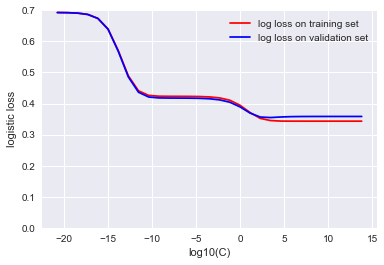

Best C-value for LR with 2-feature data: 31.623
Validation set log-loss at best C-value: 0.3549


In [18]:
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.plot(np.log(C_grid), tr_loss_list_2, 'r-', label = 'log loss on training set');
plt.plot(np.log(C_grid), va_loss_list_2, 'b-', label = 'log loss on validation set');
# TODO add legend
plt.legend(); plt.show()
print("Best C-value for LR with 2-feature data: %.3f" % C_grid[np.argmin(va_loss_list_2)]) # TODO
print("Validation set log-loss at best C-value: %.4f" % np.min(va_loss_list_2))

In [20]:
np.argmin(va_loss_list_2)

21

In [22]:
va_loss_list_2[-1]

0.35844124901785757

In [27]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
X[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [28]:
clf.predict(X[:2, :])

array([0, 0])